This "Intro to machine learning" is from Kaggle course. There are some additions and deletions as per my need.

# Step 1: Import necessary libraries

In [1]:
import pandas as pd

# Step 2: Load the data and Review it

In [2]:
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv('melb_data.csv') 

# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Step 3: Think about the data
When was the lastest house built? Why the latest house is so old? etc

In [3]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
melbourne_data.info

<bound method DataFrame.info of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12

In [5]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Step 4: Data Cleaning

In [6]:
melbourne_data[melbourne_data.isnull().any(axis=1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [7]:
melbourne_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
#Check if there is any duplicates
melbourne_data.duplicated().any()

False

In [9]:
#Drop the rows with missing values melbourne_data.dropna(axis = 0) OR
melbourne_data_filtered = melbourne_data.dropna()

In [10]:
melbourne_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

# Select the Prediction Target

dot notation is used to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [11]:
y = melbourne_data_filtered.Price

# Choose Features
Features are columns names that is input in the model to predict. It can be some columns (considered as factors to afftect the targeted column) or all columns except the target column.

In [12]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude']

By convention, this data is called X.

In [13]:
X = melbourne_data_filtered[melbourne_features]

In [14]:
X.describe()

,Rooms,Bathroom,Landsize,YearBuilt,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,1964.081988,-37.807904,144.990201
std,0.971079,0.711362,897.449881,38.105673,0.075850,0.099165
min,1.000000,1.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,1940.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,1970.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,2000.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,2018.000000,-37.457090,145.526350


In [15]:
X.head()

,Rooms,Bathroom,Landsize,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,1890.0,-37.8060,144.9954


# Building Your Model

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

    Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
    Fit: Capture patterns from provided data. This is the heart of modeling.
    Predict: Just what it sounds like
    Evaluate: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [18]:
#help("modules")

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [19]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [20]:
melbourne_data_filtered.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


You can see from above two cells that predicted price exactly matches with the price in the data set. 

So, you've built a model. But how good is it?

# Model Validation

In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. 

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is: 

error=actual−predicted

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality.



In [22]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

634.1187863137508


## The Problem with "In-Sample" Scores

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.


# Split Data into Train and Test data

In [24]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
# Define model
melbourne_model_tt = DecisionTreeRegressor()
# Fit model
melbourne_model_tt.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model_tt.predict(val_X)
mean_absolute_error(val_y, val_predictions)

263152.2724338283

## Experimenting With Different Models¶

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's [documentation]{https://scikit-learn.org/stable/modules/tree.html#tree}  that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth.


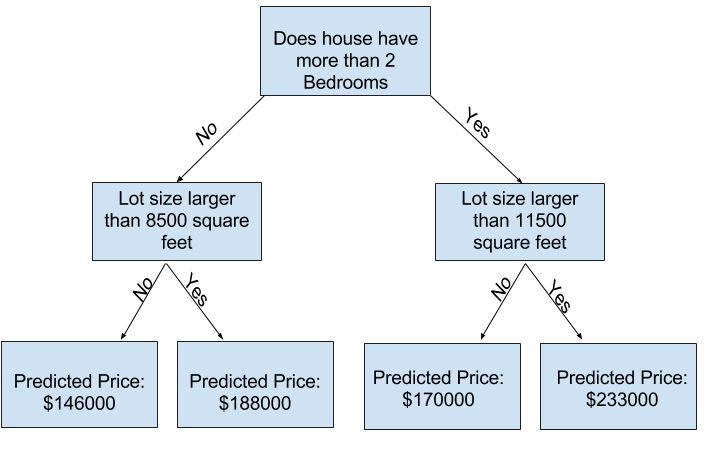


In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have 210

groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.

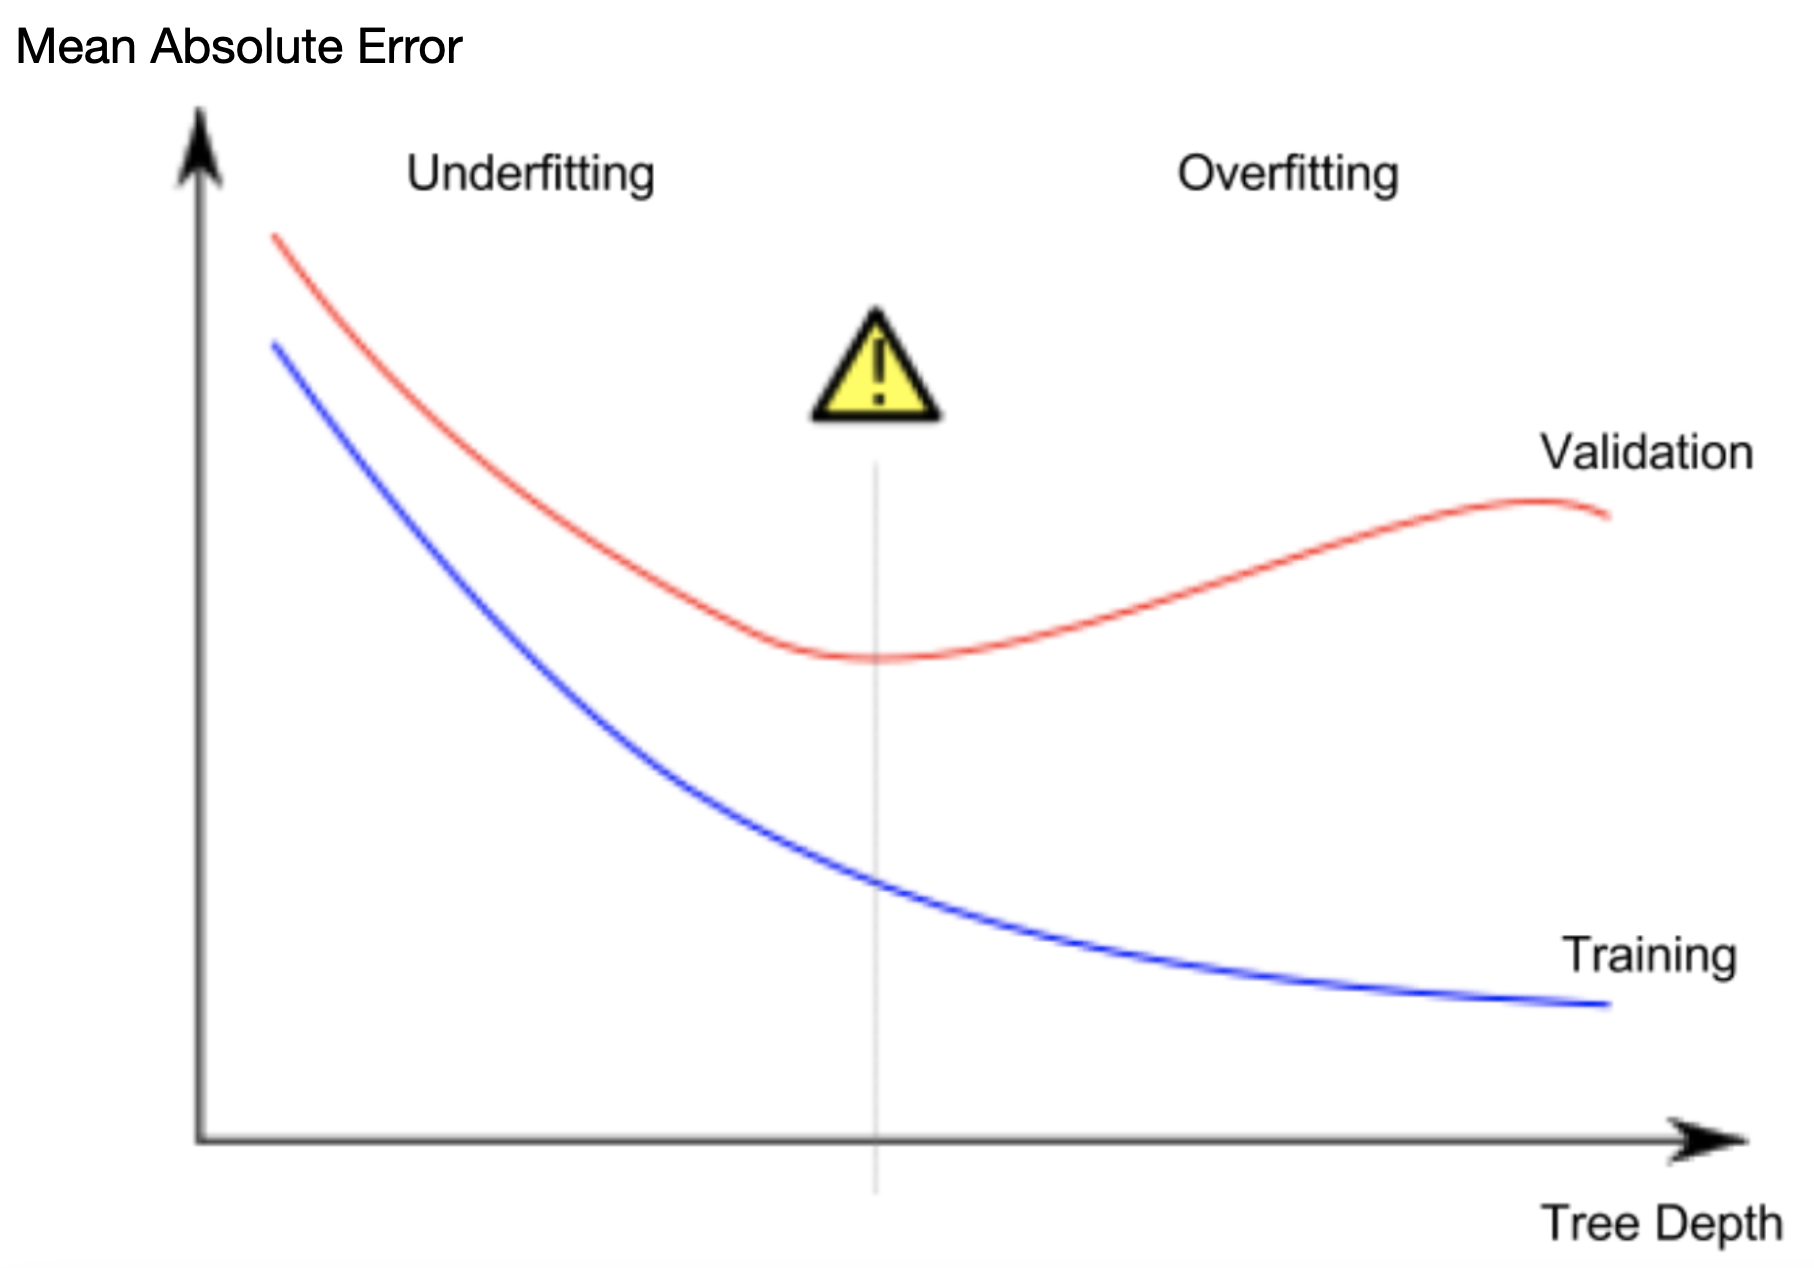

### Example¶

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen.



We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.


In [26]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  361513
Max leaf nodes: 50  		 Mean Absolute Error:  263951
Max leaf nodes: 500  		 Mean Absolute Error:  246967
Max leaf nodes: 5000  		 Mean Absolute Error:  261153


In [27]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [400,450, 500, 550, 600, 6505]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 400  		 Mean Absolute Error:  248994
Max leaf nodes: 450  		 Mean Absolute Error:  249000
Max leaf nodes: 500  		 Mean Absolute Error:  246967
Max leaf nodes: 550  		 Mean Absolute Error:  248316
Max leaf nodes: 600  		 Mean Absolute Error:  249349
Max leaf nodes: 6505  		 Mean Absolute Error:  261153


Of the options listed, 500 is the optimal number of leaves.

### Conclusion

Here's the takeaway: Models can suffer from either:

    Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
    Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

# Random Forests

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [28]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


184981.21609978785


### Conclusion

There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.